<h3><b> Chapter 9: Support Vector Machines </b></h3>

In [2]:
# Libraries
import numpy as np
import sklearn.model_selection as skm

from matplotlib.pyplot import subplots, cm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

<b> Q4 </b>

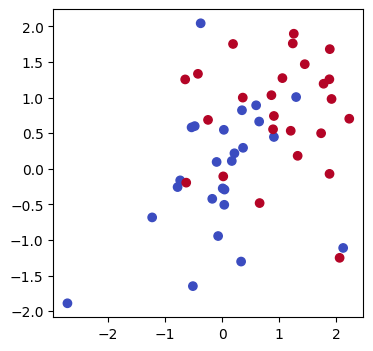

In [5]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1] * 25 + [1] * 25)
X[y==1] += 1
fig, ax = subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

Confusion table for linear decision boundary: 
Truth      -1   1
Predicted        
-1         17   2
 1          8  23
Confusion table for non-linear decision boundary: 
Truth      -1   1
Predicted        
-1         21   5
 1          4  20


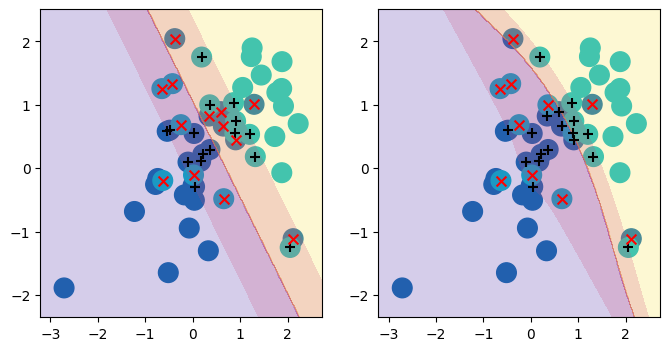

In [15]:
# Assume tuning parameter C=10
svm_linear = SVC(C=10, kernel="linear")
svm_linear.fit(X, y)
svm_nonlinear = SVC(C=10, kernel="poly")
svm_nonlinear.fit(X, y)

# Plot linear and non-linear decision boundaries
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4))
plot_svm(X, y, svm_linear, ax=ax1)
plot_svm(X, y, svm_nonlinear, ax=ax2)

# Plot confusion matrix on testing data
X_test = rng.standard_normal((50, 2))
y_test = np.array([-1] * 25 + [1] * 25)
X_test[y_test==1] += 1

linear_y_test_hat = svm_linear.predict(X_test)
nonlinear_y_test_hat = svm_nonlinear.predict(X_test)
print(f"Confusion table for linear decision boundary: \n{confusion_table(linear_y_test_hat, y_test)}")
print(f"Confusion table for non-linear decision boundary: \n{confusion_table(nonlinear_y_test_hat, y_test)}")

<b> Q5 </b>

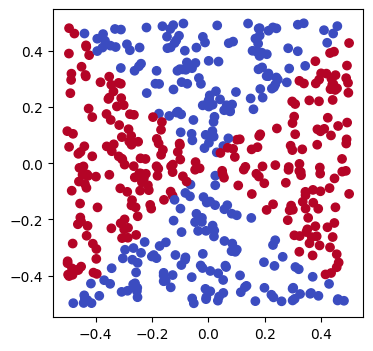

In [22]:
# 5a-b
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500)- 0.5
x2 = rng.uniform(size=500)- 0.5
y = x1**2- x2**2 > 0

fig, ax = subplots(figsize=(4, 4))
ax.scatter(x=x1, y=x2, c=y, cmap=cm.coolwarm);

In [ ]:
# 5c
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

